In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [442]:
google_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/GooglePayIndia.csv")
paytm_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/PaytmIndia.csv")
phonepay_data = pd.read_csv("Datasets/UPI_Payment_Apps_review/PhonePayIndia.csv")

In [443]:
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [444]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34228 entries, 0 to 34227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            34228 non-null  int64 
 1   reviewId              34228 non-null  object
 2   userName              34227 non-null  object
 3   userImage             34228 non-null  object
 4   content               34223 non-null  object
 5   score                 34228 non-null  int64 
 6   thumbsUpCount         34228 non-null  int64 
 7   reviewCreatedVersion  29987 non-null  object
 8   at                    34228 non-null  object
 9   replyContent          6112 non-null   object
 10  repliedAt             6112 non-null   object
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [445]:
num_category = [feature for feature in google_data.columns if google_data[feature].dtypes != "O"]
google_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [446]:
num_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes != "O"]
paytm_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

In [447]:
num_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes != "O"]
phonepay_data[num_category].isnull().sum()

Unnamed: 0       0
score            0
thumbsUpCount    0
dtype: int64

<AxesSubplot:title={'center':'Checking Outliers in PhonePay thumbsUpCount Column'}, xlabel='thumbsUpCount'>

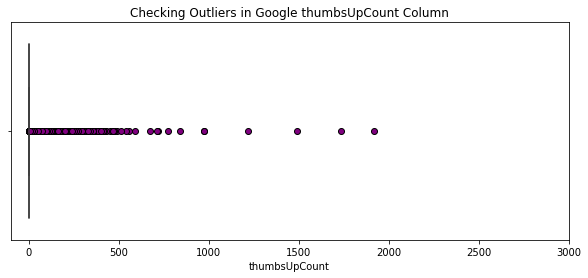

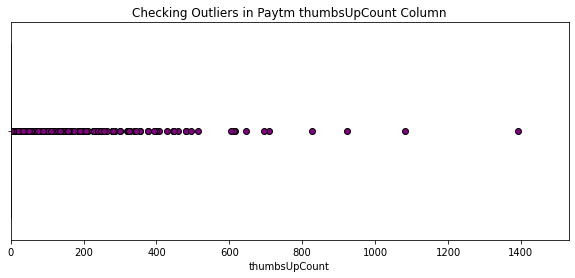

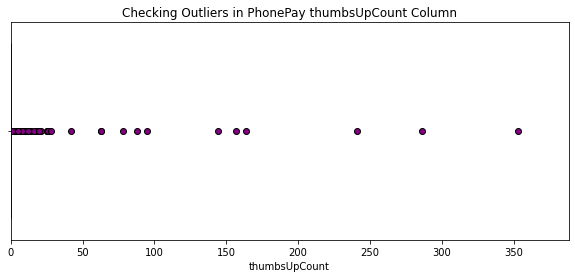

In [448]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
flierprops = dict(marker='o', markerfacecolor='purple', markersize=6,
                  linestyle='none', markeredgecolor='black')
plt.title("Checking Outliers in Google thumbsUpCount Column")
sns.boxplot(x=google_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in Paytm thumbsUpCount Column")
plt.xlim(paytm_data.thumbsUpCount.min(), paytm_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=paytm_data.thumbsUpCount, flierprops=flierprops)

plt.figure(figsize=(10,4))
plt.title("Checking Outliers in PhonePay thumbsUpCount Column")
plt.xlim(phonepay_data.thumbsUpCount.min(), phonepay_data.thumbsUpCount.max()*1.1)
sns.boxplot(x=phonepay_data.thumbsUpCount, flierprops=flierprops)

In [449]:
google_data = google_data[google_data["thumbsUpCount"] <=500]
paytm_data = paytm_data[paytm_data["thumbsUpCount"] <=550]
phonepay_data = phonepay_data[phonepay_data["thumbsUpCount"] <=100]
google_data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN


In [450]:
cat_category = [feature for feature in google_data.columns if google_data[feature].dtypes == "O"]
google_data[cat_category].isnull().sum()

reviewId                    0
userName                    1
userImage                   0
content                     5
reviewCreatedVersion     4241
at                          0
replyContent            28106
repliedAt               28106
dtype: int64

In [451]:
google_data = google_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
google_data["replyContent"] = google_data["replyContent"].fillna("No_reply/No_data")

In [452]:
cat_category = [feature for feature in paytm_data.columns if paytm_data[feature].dtypes == "O"]
paytm_data[cat_category].isnull().sum()

reviewId                    0
userName                    0
userImage                   0
content                     2
reviewCreatedVersion    23665
at                          0
replyContent            69777
repliedAt               69777
dtype: int64

In [453]:
paytm_data = paytm_data.drop(columns=["reviewCreatedVersion","repliedAt"])
paytm_data["replyContent"] = paytm_data["replyContent"].fillna("No_reply/No_data")

In [454]:
cat_category = [feature for feature in phonepay_data.columns if phonepay_data[feature].dtypes == "O"]
phonepay_data[cat_category].isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
reviewCreatedVersion    2136
at                         0
replyContent            8803
repliedAt               8803
dtype: int64

In [455]:
phonepay_data = phonepay_data.drop(columns=["reviewCreatedVersion", "repliedAt"])
phonepay_data["replyContent"] = phonepay_data["replyContent"].fillna("No_reply/No_data")

In [456]:
google_data = google_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
paytm_data = paytm_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)
phonepay_data = phonepay_data.drop(["Unnamed: 0", "reviewId", "userName", "userImage"],axis=1)

In [457]:
google_data["upi_company"] = "Google"
paytm_data["upi_company"] = "paytm"
phonepay_data["upi_company"] = "phonepay"

In [458]:
google_data = google_data.sample(frac=1).reset_index(drop=True)
paytm_data = paytm_data.sample(frac=1).reset_index(drop=True)
phonepay_data = phonepay_data.sample(frac=1).reset_index(drop=True)

data = phonepay_data.append([paytm_data[:11735 ], google_data[:11735]], ignore_index=True)

data = data.rename(columns={"at": "review_created_at"})
data.head()

,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,Good,5,0,2021-11-14 09:18:09,No_reply/No_data,phonepay
1,Server prblm hai app me but sa hi hai,1,0,2021-11-12 08:19:13,"Hi Shailesh, this is not the experience we wan...",phonepay
2,Excellent,5,0,2021-11-18 12:34:25,No_reply/No_data,phonepay
3,Nice,5,0,2021-11-18 13:09:44,No_reply/No_data,phonepay
4,Nice,5,0,2021-11-11 17:09:25,No_reply/No_data,phonepay


In [459]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,content,score,thumbsUpCount,review_created_at,replyContent,upi_company
0,Good working love this aap,5,0,2021-11-14 23:49:43,No_reply/No_data,phonepay
1,Nice,5,0,2021-10-31 08:18:20,No_reply/No_data,paytm
2,Superb,5,0,2021-11-15 12:09:28,No_reply/No_data,phonepay
3,AfzalkhanSP,5,0,2021-10-31 13:23:10,No_reply/No_data,paytm
4,Very good app for payment,4,0,2021-10-15 11:48:24,No_reply/No_data,paytm


In [460]:
data["review_created_at"] = pd.to_datetime(data["review_created_at"])
data["Year"] = data['review_created_at'].dt.year
data["month"] = data['review_created_at'].dt.month
data = data[["upi_company", "Year", "month", "content", "score", "thumbsUpCount", "replyContent"]]
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,phonepay,2021,11,Good working love this aap,5,0,No_reply/No_data
1,paytm,2021,10,Nice,5,0,No_reply/No_data
2,phonepay,2021,11,Superb,5,0,No_reply/No_data
3,paytm,2021,10,AfzalkhanSP,5,0,No_reply/No_data
4,paytm,2021,10,Very good app for payment,4,0,No_reply/No_data


In [461]:
scores = [0, 1, 2, 3, 4, 5]
scores_name = ["very Negative", "Negative", "Average", "Positive", "Excellent"]
data["score"] = pd.cut(data["score"],scores, labels=scores_name)
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,phonepay,2021,11,Good working love this aap,Excellent,0,No_reply/No_data
1,paytm,2021,10,Nice,Excellent,0,No_reply/No_data
2,phonepay,2021,11,Superb,Excellent,0,No_reply/No_data
3,paytm,2021,10,AfzalkhanSP,Excellent,0,No_reply/No_data
4,paytm,2021,10,Very good app for payment,Positive,0,No_reply/No_data


In [462]:
backup_data = data.copy()

# EDA

## First i will do eda on each an every company seperately

### EDA On Google

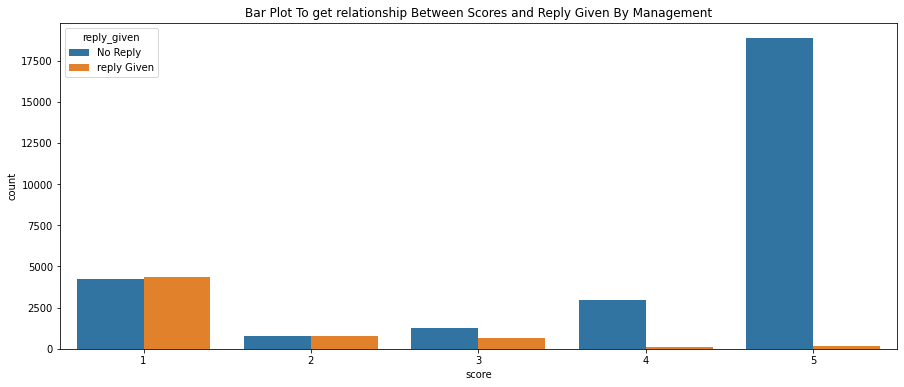

In [463]:
google_data["reply_given"] = google_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()


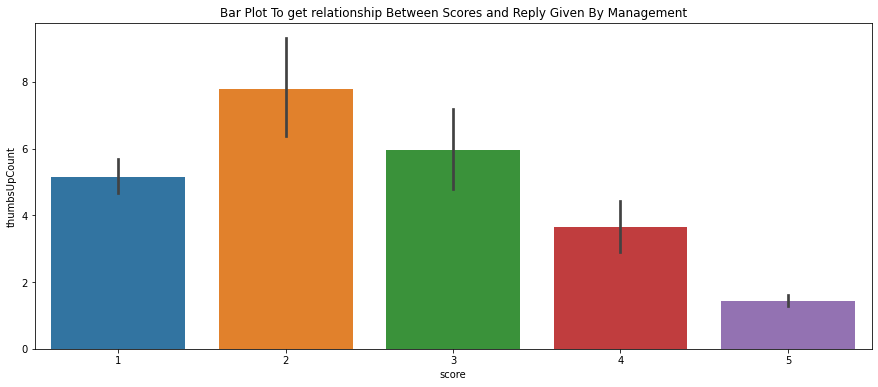

In [464]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=google_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()


## EDA On Paytm

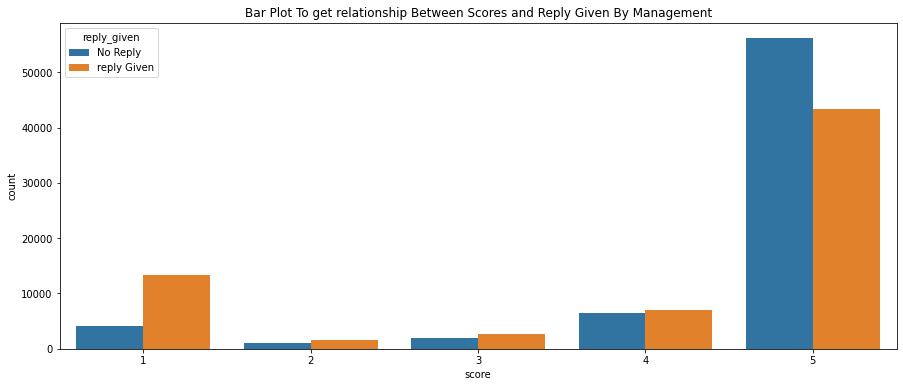

In [465]:
paytm_data["reply_given"] = paytm_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

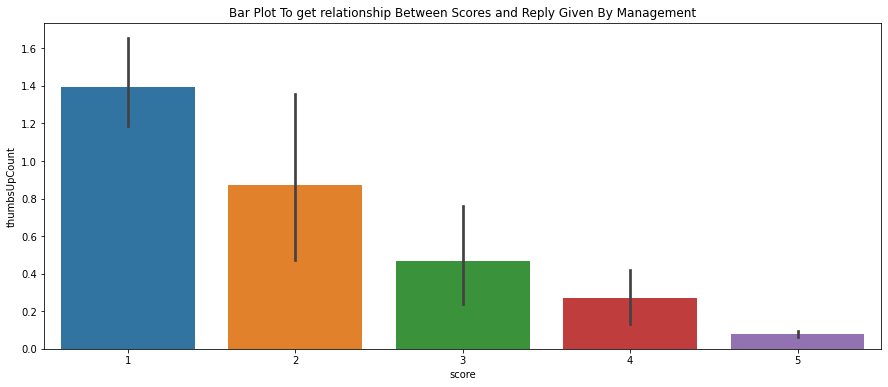

In [466]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=paytm_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

## EDA On PhonePay

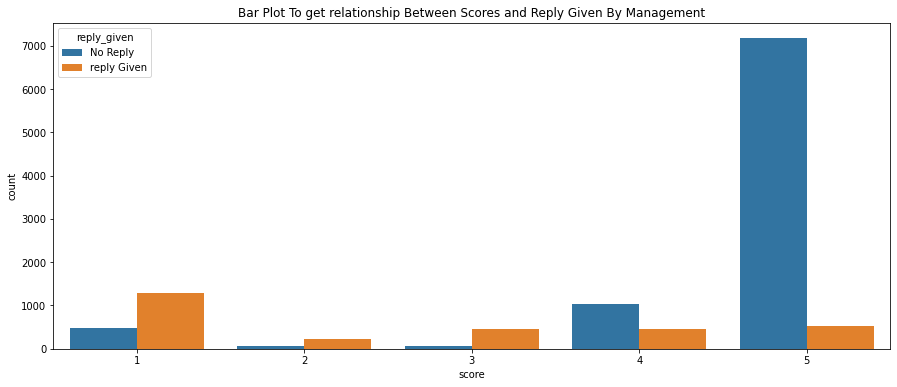

In [467]:
phonepay_data["reply_given"] = phonepay_data["replyContent"].apply(lambda x: "reply Given" if x != 'No_reply/No_data' else "No Reply")

plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="reply_given", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

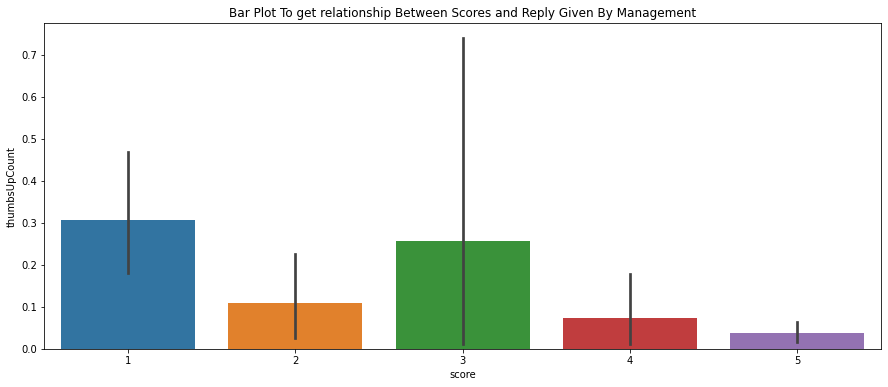

In [468]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", data=phonepay_data)
plt.title('Bar Plot To get relationship Between Scores and Reply Given By Management')
plt.show()

## Duing EDA On all the companies
We have done the EDA on all individual Companies now we will compare all the Companies together and find the best Company.

In [469]:
data.head()

,upi_company,Year,month,content,score,thumbsUpCount,replyContent
0,phonepay,2021,11,Good working love this aap,Excellent,0,No_reply/No_data
1,paytm,2021,10,Nice,Excellent,0,No_reply/No_data
2,phonepay,2021,11,Superb,Excellent,0,No_reply/No_data
3,paytm,2021,10,AfzalkhanSP,Excellent,0,No_reply/No_data
4,paytm,2021,10,Very good app for payment,Positive,0,No_reply/No_data


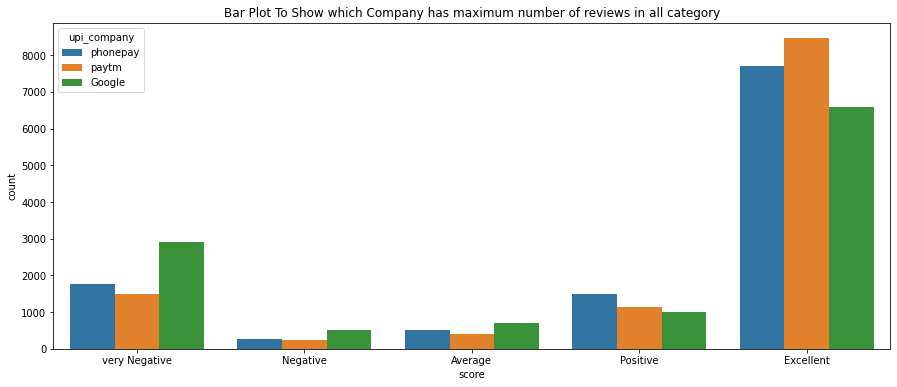

In [473]:
plt.figure(figsize=(15,6))
sns.countplot(x="score", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has maximum number of reviews in all category')
plt.show()

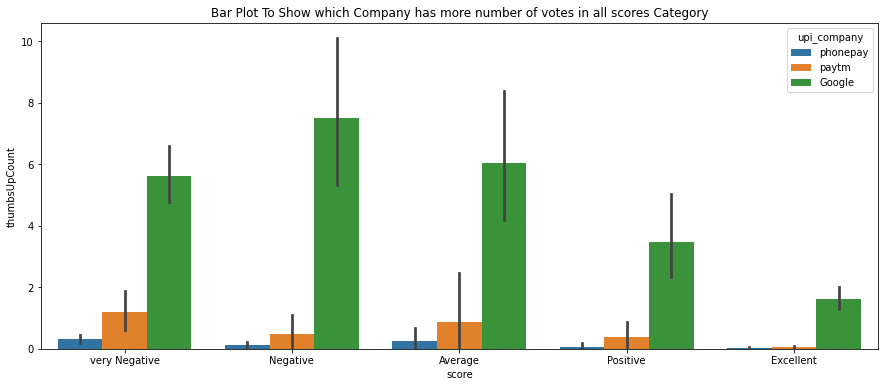

In [475]:
plt.figure(figsize=(15,6))
sns.barplot(x="score", y="thumbsUpCount", hue="upi_company", data=data)
plt.title('Bar Plot To Show which Company has more number of votes in all scores Category')
plt.show()